<a href="https://colab.research.google.com/github/OsamaAwniHamdan/Prediction-of-Product-Sales/blob/main/Project_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import glob
import pandas as pd
folder = "C:\\Users\\osama\\Downloads\\Chicago_Crime_2001-2022\\Data\\"


crime_files = sorted(glob.glob(folder+"*.csv"))
df = pd.concat([pd.read_csv(f) for f in crime_files])
df.head()

,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude
0,1326041,01/01/2001 01:00:00 AM,BATTERY,SIMPLE,RESIDENCE,False,False,1624,16.0,NaN,41.957850,-87.749185
1,1319931,01/01/2001 01:00:00 PM,BATTERY,SIMPLE,RESIDENCE,False,True,825,8.0,NaN,41.783892,-87.684841
2,1324743,01/01/2001 01:00:00 PM,GAMBLING,ILLEGAL ILL LOTTERY,STREET,True,False,313,3.0,NaN,41.780412,-87.611970
3,1310717,01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,2424,24.0,NaN,42.012391,-87.678032
4,1318099,01/01/2001 01:00:00 AM,BATTERY,SIMPLE,RESIDENCE PORCH/HALLWAY,False,True,214,2.0,NaN,41.819538,-87.620020


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7713109 entries, 0 to 238857
Data columns (total 12 columns):
 #   Column                Dtype  
---  ------                -----  
 0   ID                    int64  
 1   Date                  object 
 2   Primary Type          object 
 3   Description           object 
 4   Location Description  object 
 5   Arrest                bool   
 6   Domestic              bool   
 7   Beat                  int64  
 8   District              float64
 9   Ward                  float64
 10  Latitude              float64
 11  Longitude             float64
dtypes: bool(2), float64(4), int64(2), object(4)
memory usage: 662.0+ MB


In [ ]:
df.isna().sum()

ID                           0
Date                         0
Primary Type                 0
Description                  0
Location Description     10928
Arrest                       0
Domestic                     0
Beat                         0
District                    47
Ward                    614846
Latitude                 88685
Longitude                88685
dtype: int64

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7713109 entries, 0 to 238857
Data columns (total 12 columns):
 #   Column                Dtype         
---  ------                -----         
 0   ID                    int64         
 1   Date                  datetime64[ns]
 2   Primary Type          object        
 3   Description           object        
 4   Location Description  object        
 5   Arrest                bool          
 6   Domestic              bool          
 7   Beat                  int64         
 8   District              float64       
 9   Ward                  float64       
 10  Latitude              float64       
 11  Longitude             float64       
dtypes: bool(2), datetime64[ns](1), float64(4), int64(2), object(3)
memory usage: 662.0+ MB


In [ ]:
df.set_index('Date', inplace=True)

## Topic 1) Comparing Police Districts
- Which district had the most crimes in 2022?
- Which had the least?

In [ ]:
df_2022 = df.loc['2022']
crime_counts_by_district = df_2022.groupby('District').size()
max_district_crimes = crime_counts_by_district.idxmax()
most_crimes_count = crime_counts_by_district.max()
min_district_crimes = crime_counts_by_district.idxmin()
min_crimes_count = crime_counts_by_district.min()
print("Max crimes happen in district {}, with {} crimes".format(max_district_crimes, most_crimes_count))
print("min crimes happen in district {}, with {} crimes".format(min_district_crimes, min_crimes_count))


Max crimes happen in district 8.0, with 14805 crimes
min crimes happen in district 31.0, with 15 crimes


## Topic 2) Crimes Across the Years:

- Is the total number of crimes increasing or decreasing across the years?
- Are there any individual crimes that are doing the opposite (e.g., decreasing when overall crime is increasing or vice-versa)?

Text(0, 0.5, 'Number of Crimes')

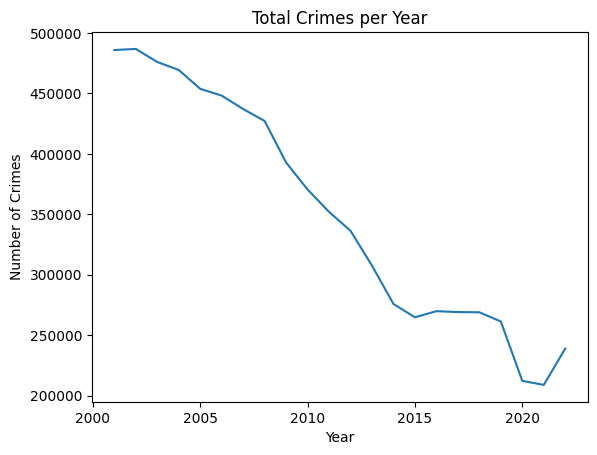

In [ ]:
import matplotlib.pyplot as plt
df_crimes = df.copy()
df_crimes['year'] = df_crimes.index.year
crims_ber_year_count = df_crimes.groupby('year').size()
crims_ber_year_count.plot()
plt.title('Total Crimes per Year')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')

- As we see from above graph the total crimes ber year are **decreasing**

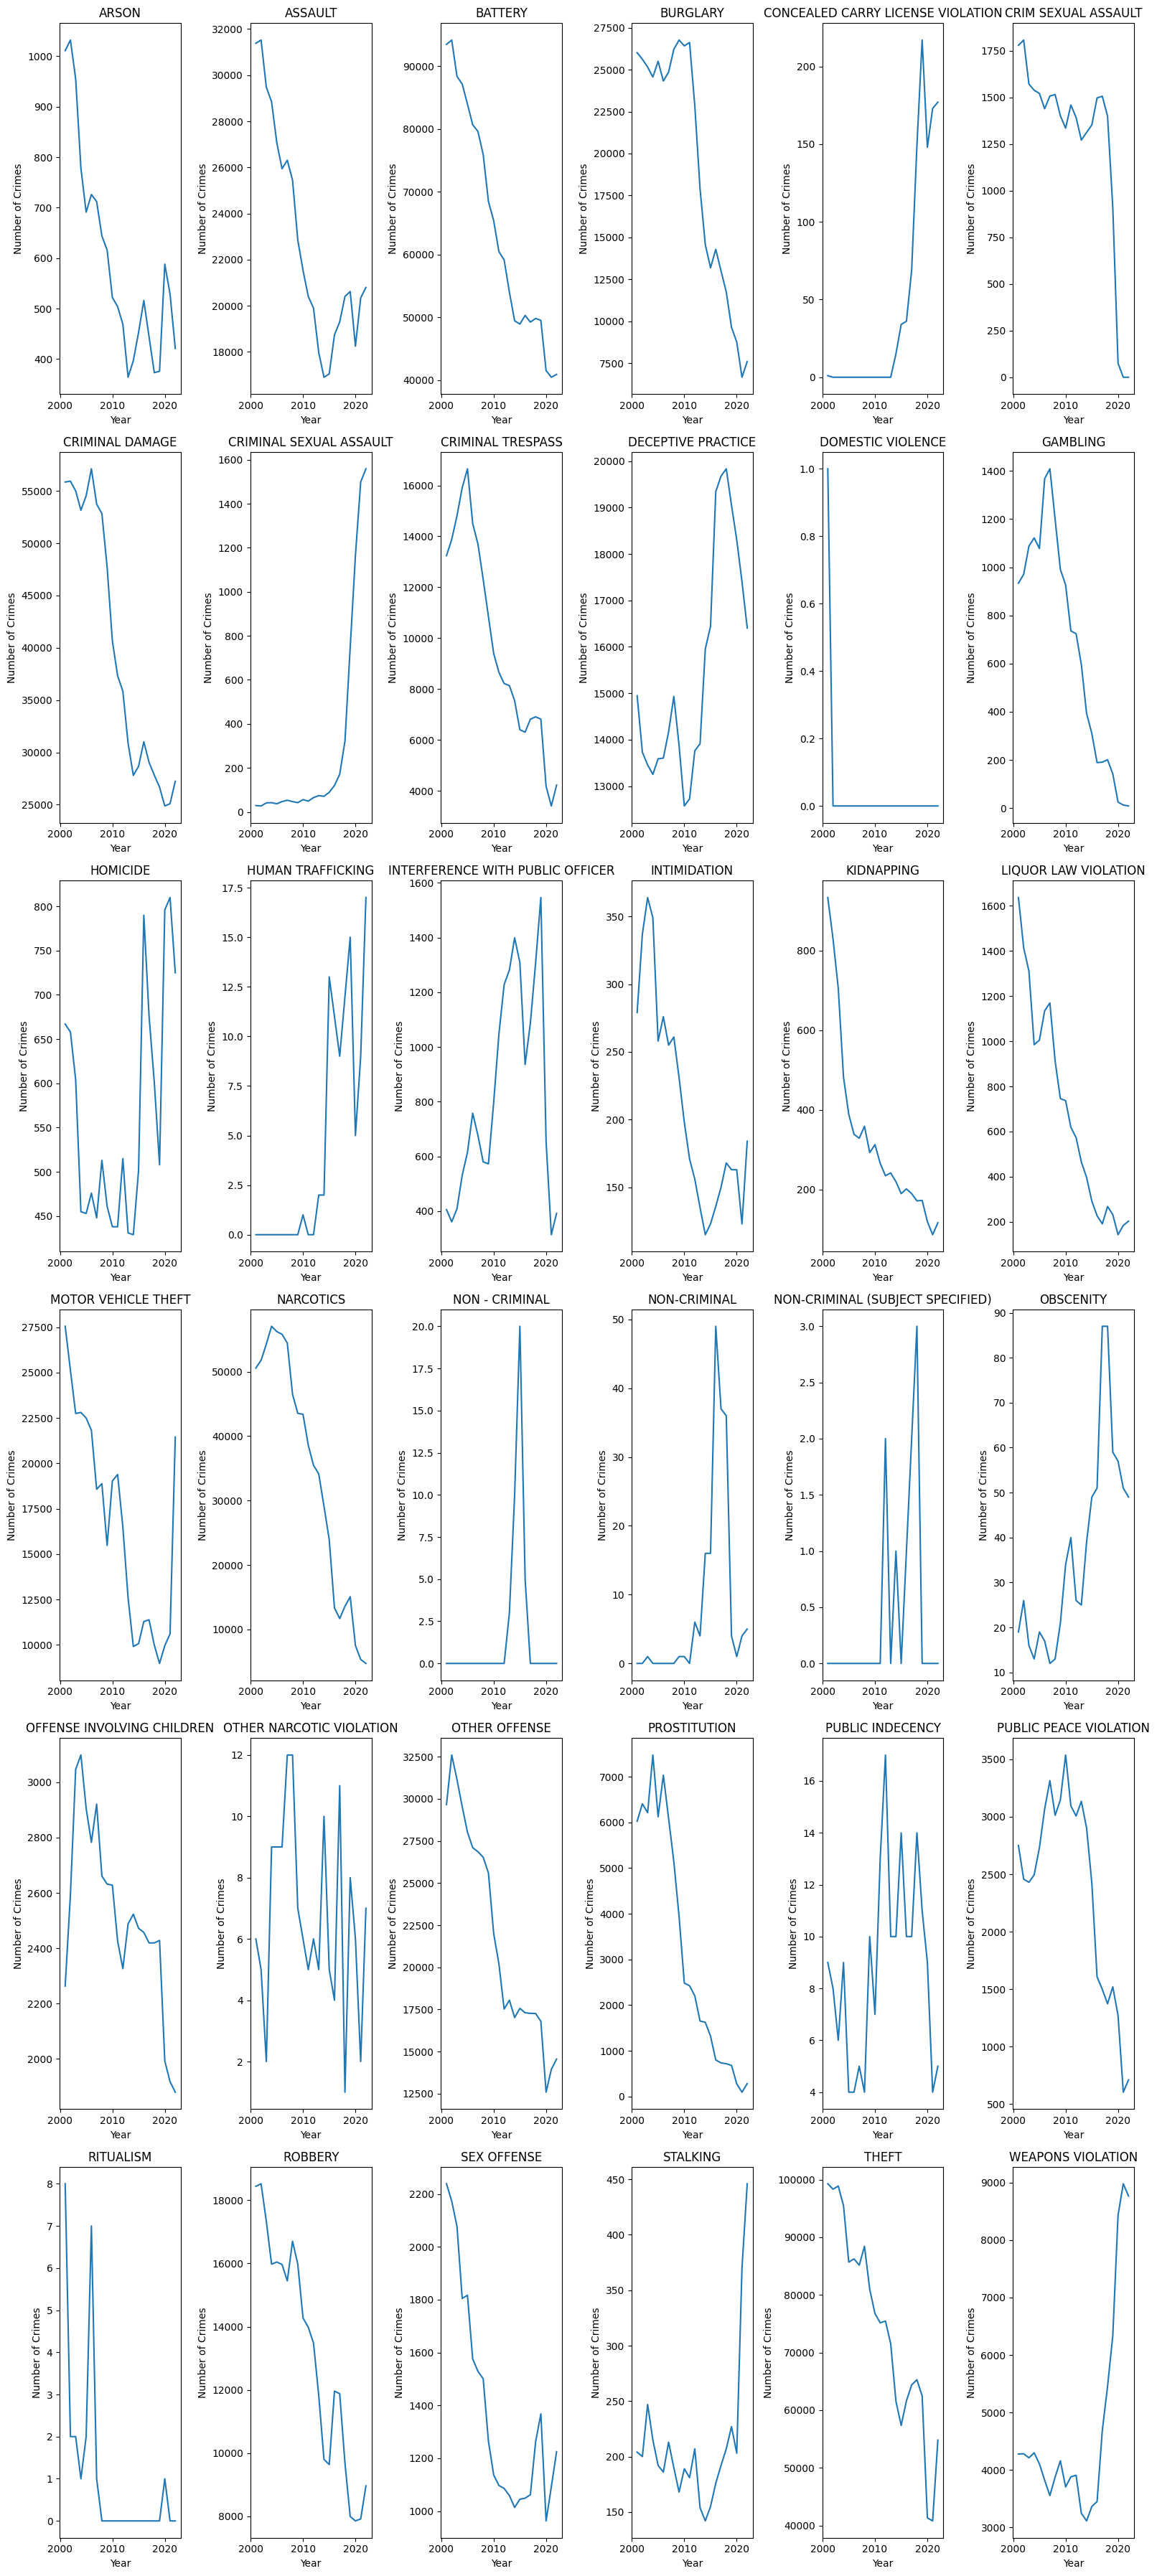

In [ ]:
import math

crimes_per_year_type = df_crimes.groupby(['year', 'Primary Type'])
count = crimes_per_year_type.size().unstack(fill_value=0)
num_cols = count.shape[1]
nrows = math.ceil(num_cols / 6)
ncols = 6

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(16, 6*nrows))

axes = axes.flatten()

for i, col in enumerate(count.columns):
    count[col].plot(ax=axes[i], title=col)
    axes[i].set_xlabel('Year')
    axes[i].set_ylabel('Number of Crimes')

plt.tight_layout()
plt.show()


## Topic 3) Comparing AM vs. PM Rush Hour:
- Are crimes more common during AM rush hour or PM rush hour?
  - You can consider any crime that occurred between 7 AM - 10 AM as AM rush hour
  - You can consider any crime that occurred between 4 - 7 PM as PM rush hour.
- Answer the question: ​What are the top 5 most common crimes during AM rush hour? What are the top 5 most common crimes during PM rush hour?
- Answer the question: ​Are Motor Vehicle Thefts more common during AM rush hour or PM Rush Hour?

In [ ]:
df_ruch = df.copy()
df_ruch['hour'] = df.index.hour
df_ruch.head()

,ID,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude,hour
Date,,,,,,,,,,,,
2001-01-01 01:00:00,1326041,BATTERY,SIMPLE,RESIDENCE,False,False,1624,16.0,NaN,41.957850,-87.749185,1
2001-01-01 13:00:00,1319931,BATTERY,SIMPLE,RESIDENCE,False,True,825,8.0,NaN,41.783892,-87.684841,13
2001-01-01 13:00:00,1324743,GAMBLING,ILLEGAL ILL LOTTERY,STREET,True,False,313,3.0,NaN,41.780412,-87.611970,13
2001-01-01 01:00:00,1310717,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,2424,24.0,NaN,42.012391,-87.678032,1
2001-01-01 01:00:00,1318099,BATTERY,SIMPLE,RESIDENCE PORCH/HALLWAY,False,True,214,2.0,NaN,41.819538,-87.620020,1


In [ ]:
am_ruch_crims = df_ruch[(df_ruch['hour'] >= 7) & (df_ruch['hour'] <= 10)]
pm_ruch_crims = df_ruch[(df_ruch['hour'] >= 16) & (df_ruch['hour'] <= 19)]
if(len(am_ruch_crims) > len(pm_ruch_crims)):
    print("Crimes in Am Ruch is more than PM Ruch")
else:
    print("Crimes in PM Ruch is more than AM Ruch")

Crimes in PM Ruch is more than AM Ruch


In [ ]:
am_ruch_crims.groupby('Primary Type').size().sort_values().tail()

Primary Type
OTHER OFFENSE       89870
BURGLARY            96219
CRIMINAL DAMAGE    109089
BATTERY            158475
THEFT              260759
dtype: int64

In [ ]:
pm_ruch_crims.groupby('Primary Type').size().sort_values().tail()

Primary Type
ASSAULT            118179
NARCOTICS          164754
CRIMINAL DAMAGE    183423
BATTERY            288003
THEFT              379122
dtype: int64

In [ ]:
pm_size = pm_ruch_crims.groupby('Primary Type').size()
am_size = am_ruch_crims.groupby('Primary Type').size()
if pm_size['MOTOR VEHICLE THEFT'] > am_size['MOTOR VEHICLE THEFT']:
    print ('MOTOR VEHICLE THEFT are common mor in PM ruch')
else:
    print ('MOTOR VEHICLE THEFT are common mor in AM ruch')

MOTOR VEHICLE THEFT are common mor in PM ruch


## Topic 4) Comparing Months:
- Answer the question: ​What months have the most crime? What months have the least?
- Answer the question: Are there any individual crimes that do not follow this pattern? If so, which crimes?

In [ ]:
df_month = df.copy()
df_month['month'] = df.index.month
df_month.head()

,ID,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude,month
Date,,,,,,,,,,,,
2001-01-01 01:00:00,1326041,BATTERY,SIMPLE,RESIDENCE,False,False,1624,16.0,NaN,41.957850,-87.749185,1
2001-01-01 13:00:00,1319931,BATTERY,SIMPLE,RESIDENCE,False,True,825,8.0,NaN,41.783892,-87.684841,1
2001-01-01 13:00:00,1324743,GAMBLING,ILLEGAL ILL LOTTERY,STREET,True,False,313,3.0,NaN,41.780412,-87.611970,1
2001-01-01 01:00:00,1310717,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,2424,24.0,NaN,42.012391,-87.678032,1
2001-01-01 01:00:00,1318099,BATTERY,SIMPLE,RESIDENCE PORCH/HALLWAY,False,True,214,2.0,NaN,41.819538,-87.620020,1


In [ ]:
max_month = df_month.groupby('month').size().idxmax()
max_value = df_month.groupby('month').size().max()
min_month = df_month.groupby('month').size().idxmin()
min_value = df_month.groupby('month').size().min()

print("Most crimes in Month: {}, and the count is: {}".format(max_month, max_value))
print("Min crimes in Month: {}, and the count is: {}".format(min_month, min_value))

Most crimes in Month: 7, and the count is: 717232
Min crimes in Month: 2, and the count is: 529391


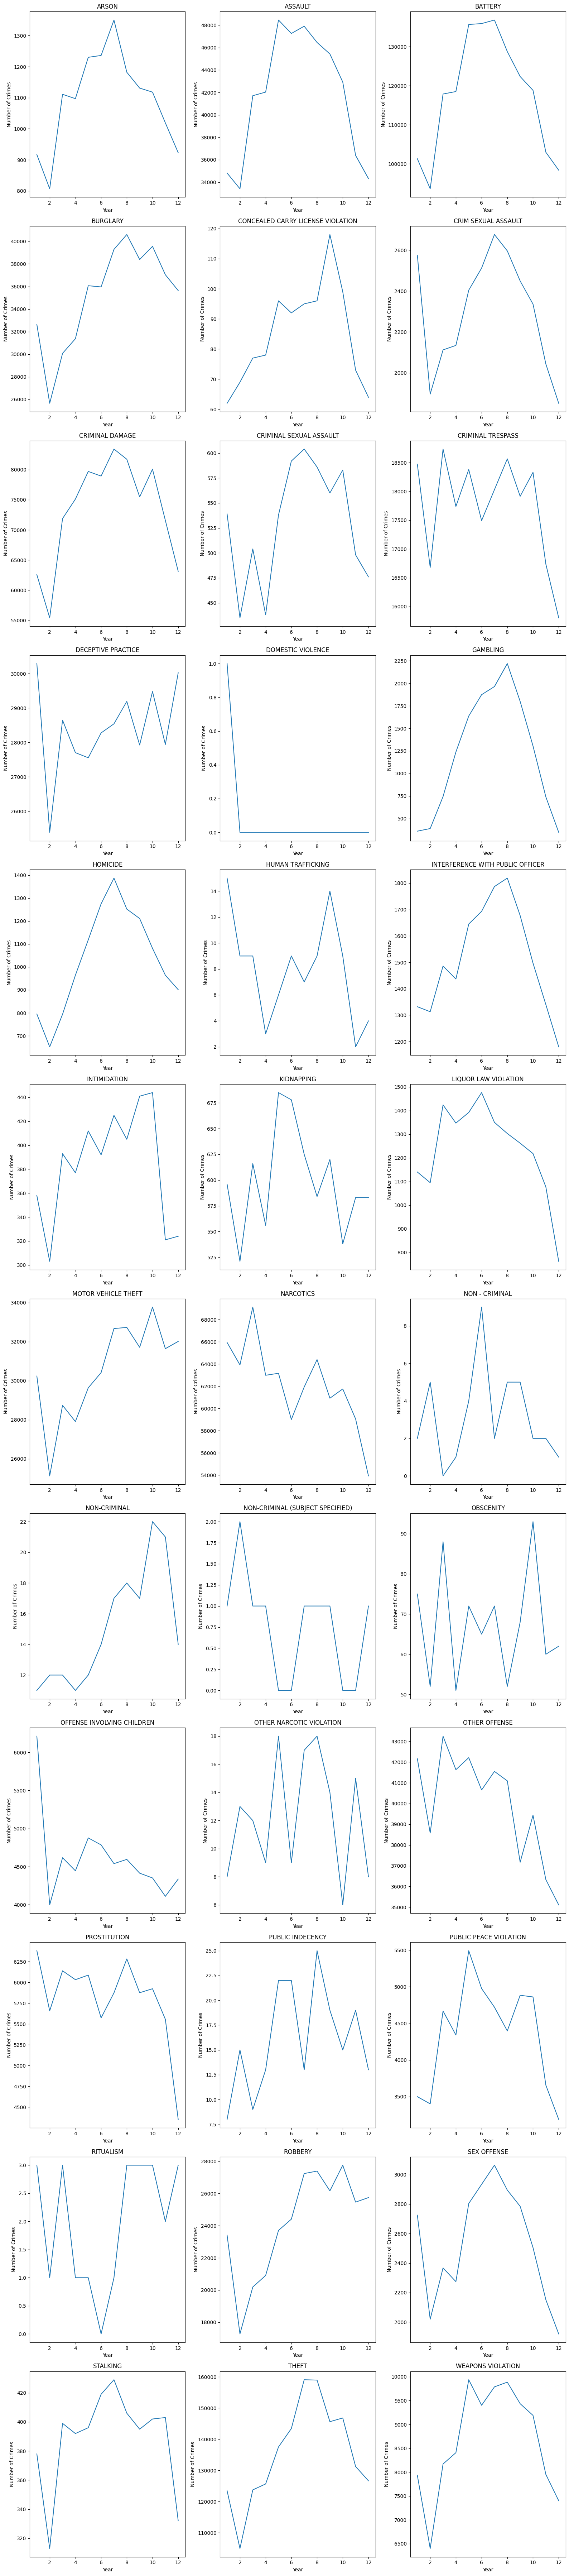

In [ ]:
crimes_per_months = df_month.groupby(['month', 'Primary Type']).size().unstack(fill_value=0)
num_cols = crimes_per_months.shape[1]
nrows = math.ceil(num_cols / 3)
ncols = 3

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(16, 6*nrows))

axes = axes.flatten()

for i, col in enumerate(crimes_per_months.columns):
    crimes_per_months[col].plot(ax=axes[i], title=col)
    axes[i].set_xlabel('Year')
    axes[i].set_ylabel('Number of Crimes')

plt.tight_layout()
plt.show()

## Topic 5) Comparing Holidays:
- Answer the question: ​What are the top 3 holidays with the largest number of crimes?
- Answer the question:  For each of the top 3 holidays with the most crime, what are the top 5 most common crimes on that holiday?

In [ ]:
import holidays
import datetime as dt
from holidays import country_holidays



In [ ]:
## making a date range that covers full dataset
all_days = pd.date_range(df.index.min(), df.index.max())
all_days



DatetimeIndex(['2001-01-01', '2001-01-02', '2001-01-03', '2001-01-04',
               '2001-01-05', '2001-01-06', '2001-01-07', '2001-01-08',
               '2001-01-09', '2001-01-10',
               ...
               '2022-12-22', '2022-12-23', '2022-12-24', '2022-12-25',
               '2022-12-26', '2022-12-27', '2022-12-28', '2022-12-29',
               '2022-12-30', '2022-12-31'],
              dtype='datetime64[ns]', length=8035, freq='D')

In [ ]:
## Create an instance of the US country holidays.
us_holidays = country_holidays('US')
us_holidays



holidays.country_holidays('US')

In [ ]:
df_h = df.copy()
df_h["US Holiday"] = [us_holidays.get(day) for day in df_h.index]
df_h.head()

,ID,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude,US Holiday
Date,,,,,,,,,,,,
2001-01-01 01:00:00,1326041,BATTERY,SIMPLE,RESIDENCE,False,False,1624,16.0,NaN,41.957850,-87.749185,New Year's Day
2001-01-01 13:00:00,1319931,BATTERY,SIMPLE,RESIDENCE,False,True,825,8.0,NaN,41.783892,-87.684841,New Year's Day
2001-01-01 13:00:00,1324743,GAMBLING,ILLEGAL ILL LOTTERY,STREET,True,False,313,3.0,NaN,41.780412,-87.611970,New Year's Day
2001-01-01 01:00:00,1310717,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,2424,24.0,NaN,42.012391,-87.678032,New Year's Day
2001-01-01 01:00:00,1318099,BATTERY,SIMPLE,RESIDENCE PORCH/HALLWAY,False,True,214,2.0,NaN,41.819538,-87.620020,New Year's Day


In [ ]:
df_by_holiday = df_h.groupby('US Holiday').size().sort_values(ascending=False)
df_by_holiday

US Holiday
New Year's Day                                     32725
Independence Day                                   22672
Labor Day                                          22164
Memorial Day                                       21125
Columbus Day                                       20920
Veterans Day                                       20418
Martin Luther King Jr. Day                         17916
Washington's Birthday                              17597
Thanksgiving                                       14798
Christmas Day                                      12418
Independence Day (observed)                         5884
Veterans Day (observed)                             5842
Christmas Day (observed)                            4929
New Year's Day (observed)                           4877
Juneteenth National Independence Day                1450
Juneteenth National Independence Day (observed)     1403
dtype: int64

- Top 3 holidays with crimes is:
    - New Year's Day
    - Independence Day
    - Labor Day   

In [ ]:
top_holiday = ["New Year's Day", 'Independence Day', 'Labor Day']
for h in top_holiday:
    print("Top 5 crimes in {}:".format(h))
    df_top = df_h[df_h['US Holiday'] == h]
    print(df_top.groupby('Primary Type').size().sort_values(ascending=False)[:5])


Top 5 crimes in New Year's Day:
Primary Type
THEFT                         6845
BATTERY                       6043
CRIMINAL DAMAGE               3236
DECEPTIVE PRACTICE            2934
OFFENSE INVOLVING CHILDREN    2380
dtype: int64
Top 5 crimes in Independence Day:
Primary Type
BATTERY            5805
THEFT              4074
CRIMINAL DAMAGE    3309
ASSAULT            1547
NARCOTICS          1522
dtype: int64
Top 5 crimes in Labor Day:
Primary Type
BATTERY            4607
THEFT              4520
CRIMINAL DAMAGE    2475
NARCOTICS          2078
ASSAULT            1525
dtype: int64


Primary Type
BATTERY            16455
THEFT              15439
CRIMINAL DAMAGE     9020
NARCOTICS           5098
OTHER OFFENSE       5014
dtype: int64